## For Crop + Rotate + Crop

In [5]:
# Define the crop function

from PIL import Image, ImageChops
Image.MAX_IMAGE_PIXELS = None #Important since our images are HUGE

import os
import cv2

rootdir = "D://OneDrive - Universiti Malaya//Work//Desktop//UM Master of Data Science//Sem 2//0 - Research Project//Data//Normal"

def trim(image):
    im = Image.open(image)
    bg = Image.new(im.mode, im.size, im.getpixel((0,0)))
    diff = ImageChops.difference(im, bg)
    diff = ImageChops.add(diff, diff, 2.0, -100)
    bbox = diff.getbbox()
    if bbox:
        return im.crop(bbox)

In [2]:
im2 = trim("Normal/1/707-DP-17-2_Default_Extended.tif")

In [4]:
im2.show()

### first crop to get ROI

In [ ]:
import os

rootdir = "D://OneDrive - Universiti Malaya//Work//Desktop//UM Master of Data Science//Sem 2//0 - Research Project//Data//Normal"

for subdir, dirs, files in os.walk(rootdir):
    for file in files:
        image_path = os.path.join(subdir, file)
        im2 = trim(image_path)
        im2.save("crop1_output.png")

if file is too big, we need to reduce the size

In [16]:
import os
import cv2

rootdir = "D://OneDrive - Universiti Malaya//Work//Desktop//UM Master of Data Science//Sem 2//0 - Research Project//Data//Normal"

for subdir, dirs, files in os.walk(rootdir):
    for file in files:
        image_path = os.path.join(subdir, file)
        image = cv2.imread(image_path)
        output_file = os.path.join(subdir,"reduced.png")
        cv2.imwrite(output_file,image)

### After reducing the size, we perform crop 1

In [17]:
import os
import cv2

rootdir = "D://OneDrive - Universiti Malaya//Work//Desktop//UM Master of Data Science//Sem 2//0 - Research Project//Data//Normal"

for subdir, dirs, files in os.walk(rootdir):
    for file in files:
        if file.endswith(".png"):
            image_path = os.path.join(subdir, file)
            im2 = trim(image_path)
            output_file = os.path.join(subdir,"crop1.png")
            im2.save(output_file)

### After crop 1, we rotate the images

In [6]:
## Define the rotate function

import numpy as np
import cv2
import math
from scipy import ndimage
import matplotlib.pyplot as plt

def rotate(image):
    #img_before = cv2.imread(image)

    #cv2.imshow("Before", img_before)    
    #key = cv2.waitKey(0)

    angles = []

    img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    img_edges = cv2.Canny(img_gray, 60, 60, apertureSize=3)
    lines = cv2.HoughLinesP(img_edges, 1, math.pi / 180.0, 100, minLineLength=100, maxLineGap=5)

    for [[x1, y1, x2, y2]] in lines:
        cv2.line(image, (x1, y1), (x2, y2), (255, 0, 0), 3)
        angle = math.degrees(math.atan2(y2 - y1, x2 - x1))
        angles.append(angle)

        #cv2.imshow("Detected lines", img_before)    
        #key = cv2.waitKey(0)

    median_angle = np.median(angles)
    img_rotated = ndimage.rotate(image, median_angle)
        
    return img_rotated

    #print(f"Angle is {median_angle:.04f}")
    #cv2.imwrite('rotated.png', img_rotated)  

In [11]:
import os
import cv2

for subdir, dirs, files in os.walk(rootdir):
    for file in files:
        if file == "crop1.png":
            image_path = os.path.join(subdir, file)
            img = cv2.imread(image_path)
            im = rotate(img)
            output_file = os.path.join(subdir,"rotated.png")
            cv2.imwrite(output_file,im)

### Check if the images are well rotated or not

D://OneDrive - Universiti Malaya//Work//Desktop//UM Master of Data Science//Sem 2//0 - Research Project//Data//Normal\1645-DP-12 - Annotation 1 Normal


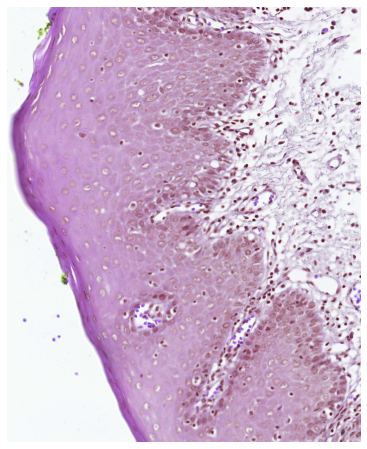

D://OneDrive - Universiti Malaya//Work//Desktop//UM Master of Data Science//Sem 2//0 - Research Project//Data//Normal\2053-DP-18 - Annotation 1 Normal


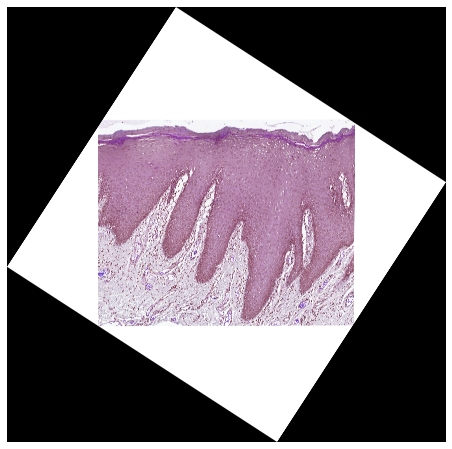

D://OneDrive - Universiti Malaya//Work//Desktop//UM Master of Data Science//Sem 2//0 - Research Project//Data//Normal\2053-DP-18 - Annotation 3


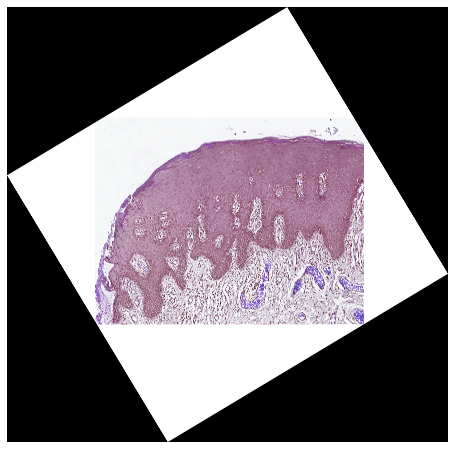

D://OneDrive - Universiti Malaya//Work//Desktop//UM Master of Data Science//Sem 2//0 - Research Project//Data//Normal\2053-DP-18 - Annotation 4


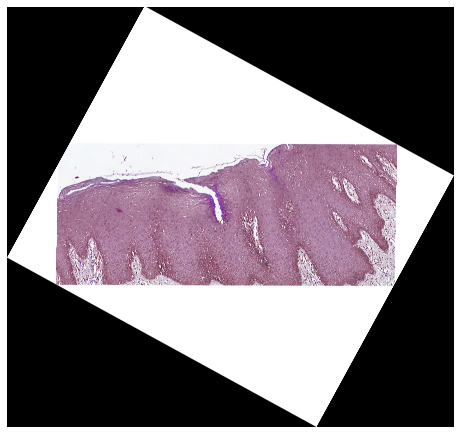

D://OneDrive - Universiti Malaya//Work//Desktop//UM Master of Data Science//Sem 2//0 - Research Project//Data//Normal\2053-DP-18 - Annotation 5


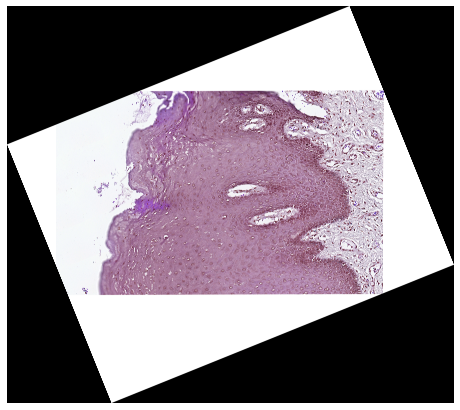

D://OneDrive - Universiti Malaya//Work//Desktop//UM Master of Data Science//Sem 2//0 - Research Project//Data//Normal\707-DP-17-2 - Annotation 1


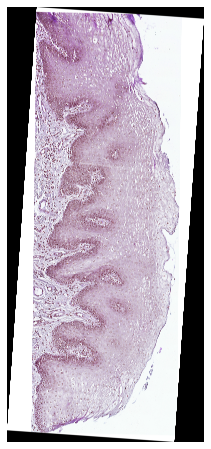

D://OneDrive - Universiti Malaya//Work//Desktop//UM Master of Data Science//Sem 2//0 - Research Project//Data//Normal\941-DP-11-2-SRI - Annotation 1 Normal


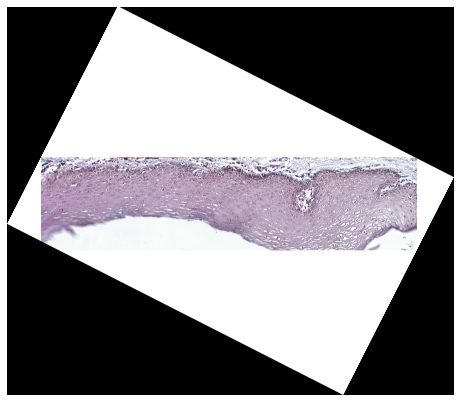

D://OneDrive - Universiti Malaya//Work//Desktop//UM Master of Data Science//Sem 2//0 - Research Project//Data//Normal\D193-19-NFC - Annotation 1


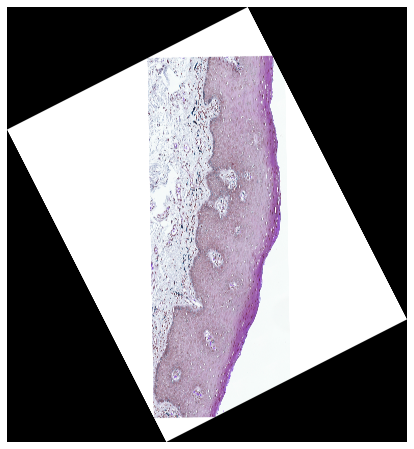

D://OneDrive - Universiti Malaya//Work//Desktop//UM Master of Data Science//Sem 2//0 - Research Project//Data//Normal\D193-19-NFC - Annotation 2


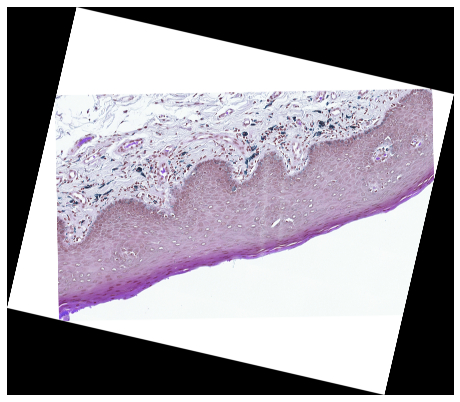

D://OneDrive - Universiti Malaya//Work//Desktop//UM Master of Data Science//Sem 2//0 - Research Project//Data//Normal\D21-19 NFC 28-5-21 - Annotation 3 Normal


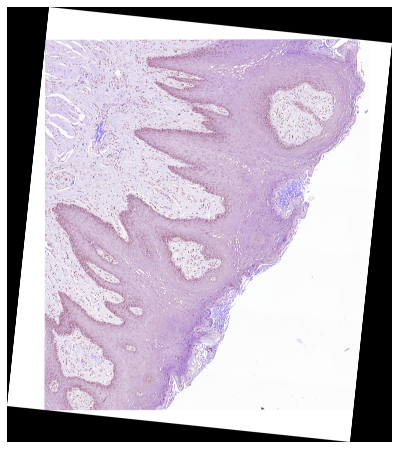

D://OneDrive - Universiti Malaya//Work//Desktop//UM Master of Data Science//Sem 2//0 - Research Project//Data//Normal\D402-19-i-NFC - Annotation 1 Normal


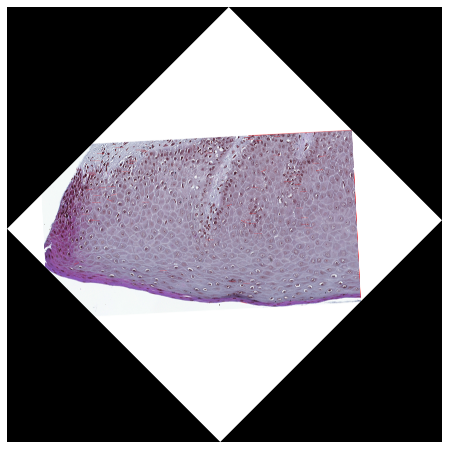

D://OneDrive - Universiti Malaya//Work//Desktop//UM Master of Data Science//Sem 2//0 - Research Project//Data//Normal\D402-19-ii-NFC-R - Annotation 1 Normal


KeyboardInterrupt: 

In [6]:
plt.rcParams["figure.figsize"] = (8,8)

for subdir, dirs, files in os.walk(rootdir):
    for file in files:
        if file == "rotated.png":
            image_path = os.path.join(subdir, file)
            img = cv2.imread(image_path)
            #img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
            print(subdir)
            plt.imshow(img)
            plt.axis("off")
            plt.show()

### Manually rotate some of the images

In [ ]:
img_before = cv2.imread('cropped.png')

img_rotated = ndimage.rotate(img_before,-21)

plt.imshow(img_rotated)

## Perform Final Crop

In [7]:
def trim2(im):
    bg = Image.new(im.mode, im.size, im.getpixel((0,0)))
    diff = ImageChops.difference(im, bg)
    diff = ImageChops.add(diff, diff, 2.0, -100)
    bbox = diff.getbbox()
    if bbox:
        return im.crop(bbox)

In [8]:
for subdir, dirs, files in os.walk(rootdir):
    for file in files:
        if file == "rotated.png":
            image_path = os.path.join(subdir, file)
            img_rotated = cv2.imread(image_path)
            img_rotated = cv2.cvtColor(img_rotated,cv2.COLOR_BGR2RGB)
            black_pixels = np.where(
                (img_rotated[:, :, 0] == 0) &
                (img_rotated[:, :, 1] == 0) &
                (img_rotated[:, :, 2] == 0)
            )
            # set those black pixels to white
            img_rotated[black_pixels] = [255, 255, 255]
            
            im = Image.fromarray(img_rotated)
            im2 = trim2(im)
            
            output_file = os.path.join(subdir, "crop2.png")
            
            im2.save(output_file)

### Check if the images are well cropped or not

D://OneDrive - Universiti Malaya//Work//Desktop//UM Master of Data Science//Sem 2//0 - Research Project//Data//Normal\1


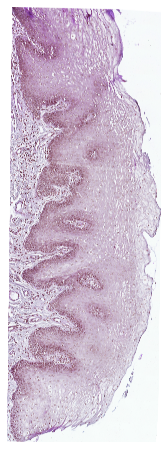

D://OneDrive - Universiti Malaya//Work//Desktop//UM Master of Data Science//Sem 2//0 - Research Project//Data//Normal\10


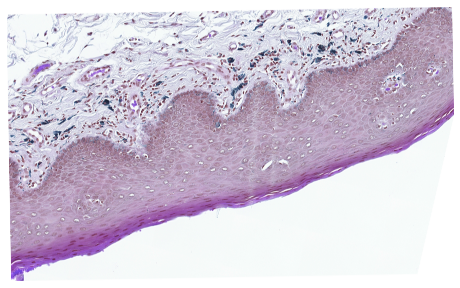

D://OneDrive - Universiti Malaya//Work//Desktop//UM Master of Data Science//Sem 2//0 - Research Project//Data//Normal\11


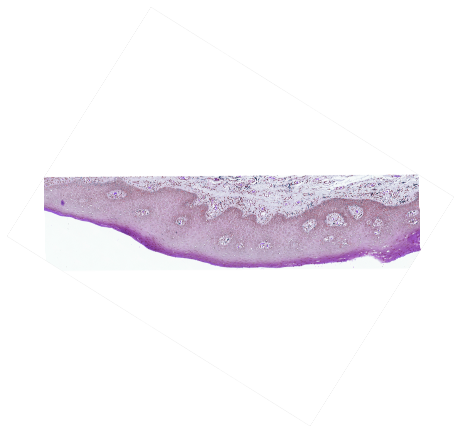

D://OneDrive - Universiti Malaya//Work//Desktop//UM Master of Data Science//Sem 2//0 - Research Project//Data//Normal\12


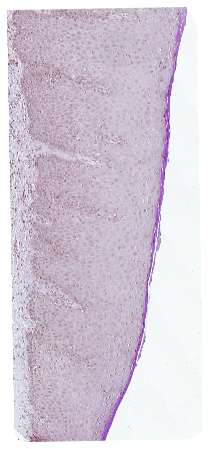

D://OneDrive - Universiti Malaya//Work//Desktop//UM Master of Data Science//Sem 2//0 - Research Project//Data//Normal\13


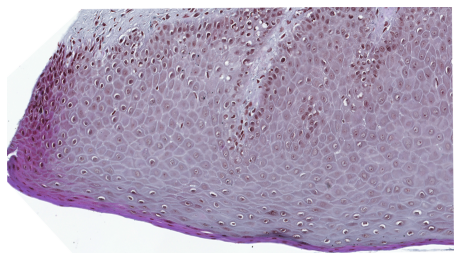

D://OneDrive - Universiti Malaya//Work//Desktop//UM Master of Data Science//Sem 2//0 - Research Project//Data//Normal\14


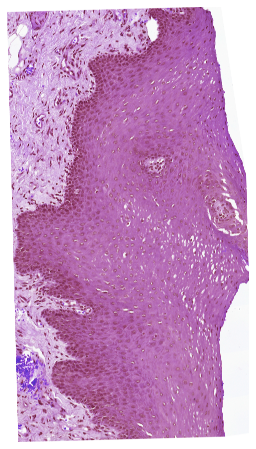

D://OneDrive - Universiti Malaya//Work//Desktop//UM Master of Data Science//Sem 2//0 - Research Project//Data//Normal\15


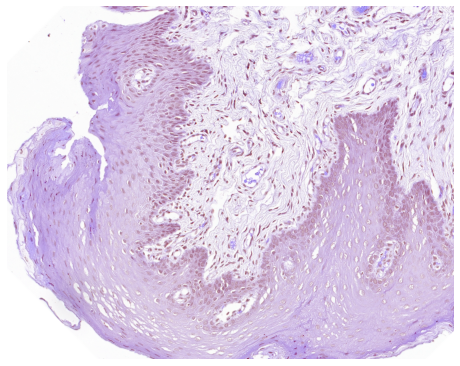

KeyboardInterrupt: 

In [9]:
for subdir, dirs, files in os.walk(rootdir):
    for file in files:
        if file == "crop2.png":
            image_path = os.path.join(subdir, file)
            img = cv2.imread(image_path)
            #img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
            print(subdir)
            plt.imshow(img)
            plt.axis("off")
            plt.show()

### Crop images into several pieces if they are too big (For normal only)

In [7]:
file_path = "Normal/4/crop2.png"
img = Image.open(file_path)
img.size

(12727, 10249)

In [9]:
from itertools import product

for subdir, dirs, files in os.walk(rootdir):
    for file in files:
        if file == "crop2.png":
            image_path = os.path.join(subdir, file)
            name, ext = os.path.splitext(file)
            img = Image.open(image_path)
            w, h = img.size
            d = 1024
            grid = product(range(0, h-h % d, d), range(0, w-w % d, d))
            for i, j in grid:
                box = (j, i, j+d, i+d)
                out = os.path.join(subdir, f'{name}_{i}_{j}{ext}')
                img.crop(box).save(out)